In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import BatchNormalization

Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  9894
Total IDS in classNo List=  9894
(9894, 32, 32, 3)
(6332, 32, 32, 3)
(1979, 32, 32, 3)
(1583, 32, 32, 3)
[43, 681, 715, 691, 700, 693, 684, 702, 697, 726]


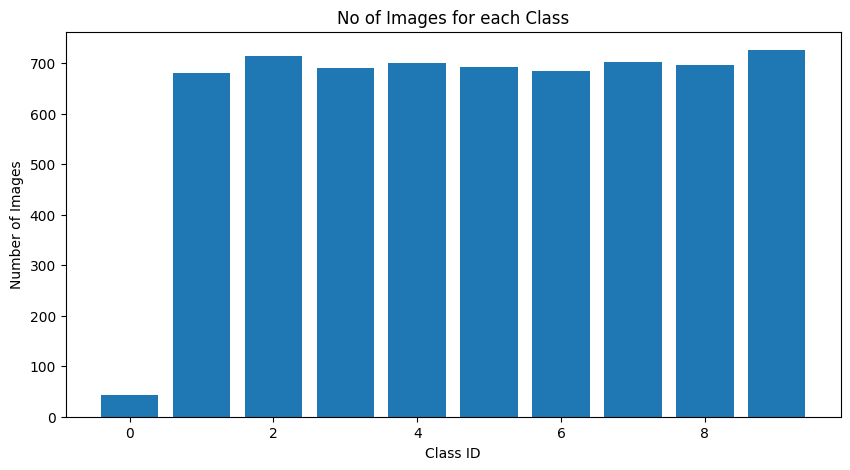

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

d:\Study\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ayush\AppData\Local\Temp\ipykernel_18808\1761637724.py:136: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGen.flow(X_train,y_train,


None
Epoch 1/15
197/197 [==============================] - 37s 187ms/step - loss: 1.1953 - accuracy: 0.5697 - val_loss: 0.1950 - val_accuracy: 0.9217
Epoch 2/15
197/197 [==============================] - 27s 136ms/step - loss: 0.4167 - accuracy: 0.8659 - val_loss: 0.0708 - val_accuracy: 0.9804
Epoch 3/15
197/197 [==============================] - 27s 138ms/step - loss: 0.2828 - accuracy: 0.9062 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 4/15
197/197 [==============================] - 28s 142ms/step - loss: 0.2203 - accuracy: 0.9325 - val_loss: 0.0499 - val_accuracy: 0.9785
Epoch 5/15
197/197 [==============================] - 28s 141ms/step - loss: 0.1992 - accuracy: 0.9370 - val_loss: 0.0354 - val_accuracy: 0.9899
Epoch 6/15
197/197 [==============================] - 29s 148ms/step - loss: 0.1645 - accuracy: 0.9476 - val_loss: 0.0349 - val_accuracy: 0.9880
Epoch 7/15
197/197 [==============================] - 27s 138ms/step - loss: 0.1471 - accuracy: 0.9514 - val_loss: 0.0535 - v

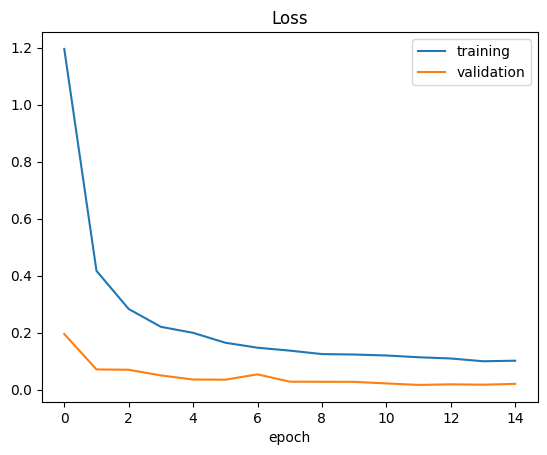

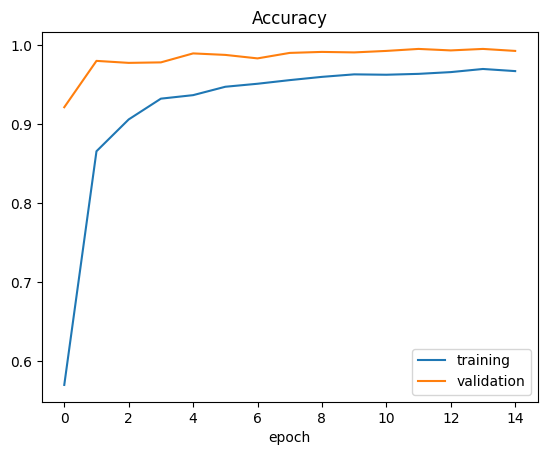

Test Score =  0.026086075231432915
Test Accuracy = 0.989893913269043


In [3]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle

################ PARAMETERS ########################
path = 'Digits_new'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)
batchSizeVal= 32
epochsVal = 15
# stepsPerEpochVal = 2000
# stepsPerEpochVal=len(X_train) // 32
####################################################

#### IMPORTING DATA/IMAGES FROM FOLDERS 
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES 
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES 
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))

#### CONVERT TO NUMPY ARRAY 
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)

#### SPLITTING THE DATA
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)
stepsPerEpochVal=len(X_train) // 32
#### PLOT BAR CHART FOR DISTRIBUTION OF IMAGES
numOfSamples= []
for x in range(0,noOfClasses):
    #print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

#### PREPOSSESSING FUNCTION FOR IMAGES FOR TRAINING 
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
# img = preProcessing(X_train[30])
# img = cv2.resize(img,(300,300))
# cv2.imshow("PreProcesssed",img)
# cv2.waitKey(0)

X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))


#### RESHAPE IMAGES 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

#### IMAGE AUGMENTATION 
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

#### ONE HOT ENCODING OF MATRICES
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

#### CREATING THE MODEL 
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2,2)
    noOfNodes= 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                      imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

#### STARTING THE TRAINING PROCESS
history = model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpochVal,
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)

#### PLOT THE RESULTS  
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

#### SAVE THE TRAINED MODEL 
model.save('model_trained.h5')  # Save as HDF5 file